<a href="https://colab.research.google.com/github/jungdennis/MLDL_study/blob/main/pytorch_chapter_1%2B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import torch
torch.__version__

'1.13.0+cu116'

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = a + b
print(c)

tensor([5, 7, 9])


# 1. 파이토치 권장 문법

In [ ]:
# 파이토치 신경망의 기본 구성
class Net(nn.Module) :
    def __init__(self) :
        '''
        신경망 구성 요소 정의
        '''

    def foward(self) :
        '''
        신경망의 동작 정의
        '''
        return output

In [ ]:
# 파이토치 데이터셋의 기본 구성
class Dataset() :
    def __init__(self) :
        '''
        필요한 데이터 불러오기
        '''

    def __len__(self) :
        '''
        데이터의 개수 반환
        '''
        return len(data)

    def __getitemm__(self, i) :
        '''
        i번째 입력 데이터와 정답을 반환
        '''
        return data[i], label[i]

In [ ]:
# 파이토치 학습의 기본 구성
for data, label in DataLoader() :
    prediction = model(data)                    # 모델의 예측값 계산
    loss = LossFunction(prediciton, label)      # 손실 함수를 이용해 오차 계산
    loss.backward()                             # 오차 역전파
    optimizer.step()                            # 신경망 가중치 수정

# 2. sin 함수 예측하기

Text(0.5, 1.0, 'y_random')

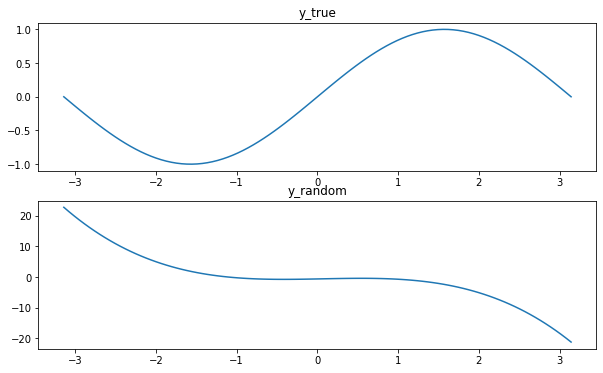

In [4]:
import math
import torch
import matplotlib.pyplot as plt

x = torch.linspace(-math.pi, math.pi, 100)
y = torch.sin(x)

# 랜덤 3차함수 만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

y_random = a * x**3 + b * x**2 + c * x + d

plt.figure(figsize = (10, 6))
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title("y_true")
plt.subplot(2, 1, 2)
plt.plot(x, y_random)
plt.title("y_random")

In [7]:
# 학습을 통해 3차함수를 sin에 근사시키기
lr = 1e-6

for epoch in range(2000) :
    y_pred = a * x**3 + b * x**2 + c * x + d

    loss = (y_pred - y).pow(2).sum().item()
    if epoch % 100 == 0 :
        print(f"epoch {epoch+1} loss : {loss}")
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = (grad_y_pred * x**3).sum()
    grad_b = (grad_y_pred * x**2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    a -= lr * grad_a
    b -= lr * grad_b
    c -= lr * grad_c
    d -= lr * grad_d

epoch 1 loss : 10.751866340637207
epoch 101 loss : 10.571117401123047
epoch 201 loss : 10.393558502197266
epoch 301 loss : 10.219135284423828
epoch 401 loss : 10.047798156738281
epoch 501 loss : 9.879487037658691
epoch 601 loss : 9.714147567749023
epoch 701 loss : 9.551728248596191
epoch 801 loss : 9.392181396484375
epoch 901 loss : 9.23544692993164
epoch 1001 loss : 9.081482887268066
epoch 1101 loss : 8.930238723754883
epoch 1201 loss : 8.781662940979004
epoch 1301 loss : 8.635708808898926
epoch 1401 loss : 8.492334365844727
epoch 1501 loss : 8.351485252380371
epoch 1601 loss : 8.213128089904785
epoch 1701 loss : 8.077208518981934
epoch 1801 loss : 7.943689823150635
epoch 1901 loss : 7.812525749206543


Text(0.5, 1.0, 'y_pred')

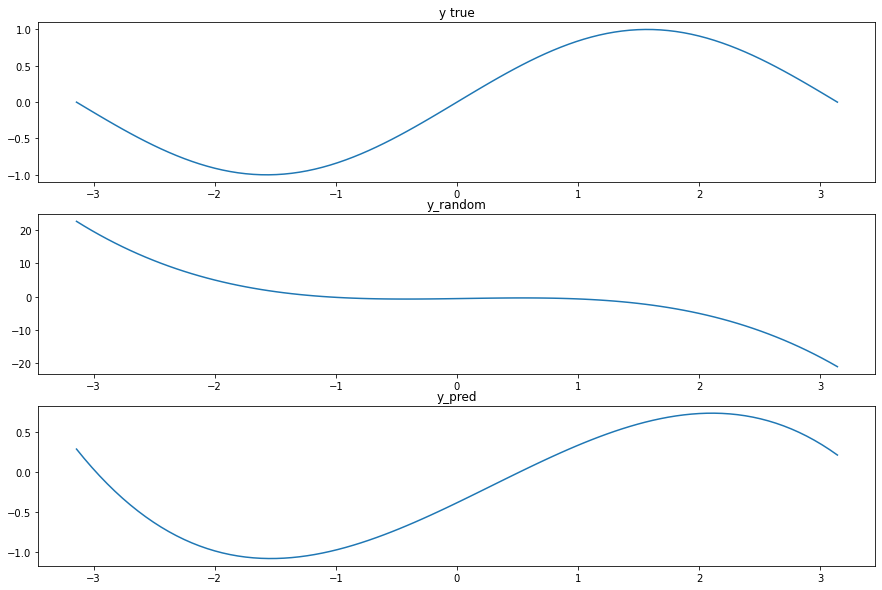

In [8]:
plt.figure(figsize = (15, 10))

plt.subplot(3,1,1)
plt.plot(x , y)
plt.title("y true")

plt.subplot(3,1,2)
plt.plot(x, y_random)
plt.title("y_random")

plt.subplot(3,1,3)
plt.plot(x, y_pred)
plt.title("y_pred")

# 3. 보스턴 집값 예측하기

In [ ]:
# 데이터셋 불러오기
import pandas as pd
from sklearn.datasets import load_boston

dataset = load_boston()
df = pd.DataFrame(dataset['data'])
df.columns = dataset['feature_names']
df['target'] = dataset['target']

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# pytorch를 이용한 학습 진행
import torch
import torch.nn as nn
from torch.optim.adam import Adam

# 데이터 만들기
X = df.iloc[:, :13].values
Y = df['target'].values

# 모델 정의
model = nn.Sequential(
    nn.Linear(13, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

batch_size = 100
lr = 0.001

# 학습 진행
optimizer = Adam(model.parameters(), lr = lr)           # optimizer 설정 : 최적화 할 파라미터와 learining rate 설정

for epoch in range(200) :
    for i in range(len(X) // batch_size) :              # iteration 계산하여 한 epoch 내에서 iteration 만큼 반복
        start = i *batch_size                           # batch_size에 맞게 학습할 index 조정
        end = start + batch_size

        x = torch.FloatTensor(X[start:end])             # tensor 내부의 데이터를 float로 변환환
        y = torch.FloatTensor(Y[start:end])

        optimizer.zero_grad()                           # optimizer의 모든 기울기를 0으로 초기화 - 매 batch 마다 반복해야 함!
        preds = model(x)                                # batch_size 만큼 model 학습 진행
        loss = nn.MSELoss()(preds, y)                   # MSE Loss 계산
        loss.backward()                                 # 역전파 진행
        optimizer.step()                                # parameter 업데이트

    if epoch % 20 == 0 :
        print(f"epoch {epoch} - loss : {loss.item()}")

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0 - loss : 69.9669418334961
epoch 20 - loss : 44.1113395690918
epoch 40 - loss : 41.437503814697266
epoch 60 - loss : 40.10070037841797
epoch 80 - loss : 39.43941879272461
epoch 100 - loss : 39.01435470581055
epoch 120 - loss : 38.907745361328125
epoch 140 - loss : 38.77009963989258
epoch 160 - loss : 38.690155029296875
epoch 180 - loss : 38.69418716430664


In [13]:
# 모델의 성능 평가
prediction = model(torch.FloatTensor(X[0, :13]))
real = Y[0]
print(f"prediction  {prediction.item()}, real : {real}")

prediction  26.096172332763672, real : 24.0


# 4. 손글씨 분류하기

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

60000 10000


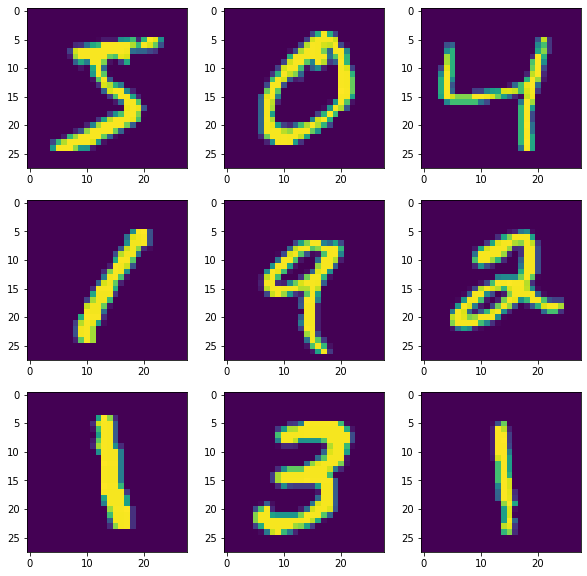

In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor         # 이미지 파일을 파이토치 텐서로 바꿔주는 함수

train_data = MNIST(root = "./", train = True, download = True, transform = ToTensor())
test_data = MNIST(root = "./", train = False, download = True, transform = ToTensor())

print(len(train_data), len(test_data))

plt.figure(figsize = (10, 10))
for i in range(9) :
    plt.subplot(3, 3, i+1)
    plt.imshow(train_data.data[i])
plt.show()

In [2]:
# 데이터셋 만들기
from torch.utils.data.dataloader import DataLoader                          # 데이터셋을 원하는 batch_size로 나누어 반환하는 매서드

train_loader = DataLoader(train_data, batch_size = 32, shuffle = True)      # 학습 데이터는 데이터 셔플이 필요
test_loader = DataLoader(test_data, batch_size = 32, shuffle = False)       # 테스트 데이터는 데이터 셔플이 필요 없음

In [3]:
# 모델 제작해서 학습하기
import torch
import torch.nn as nn
from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"             # CPU/GPU 선택 - 모든 텐서의 device는 동일해야 연산이 가능

model = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10)
)
model.to(device)                                                    # 모델의 parameter를 선택한 device로 보냄

lr = 1e-3
optim = Adam(model.parameters(), lr = lr)

for epoch in range(20) :
    for data, label in train_loader :                               # DataLoader를 이용했기 때문에 iteration을 계산할 필요없음
        optim.zero_grad()
        
        data = torch.reshape(data, (-1, 784)).to(device)            # reshape : 원하는 텐서의 모양을 원하는 사이즈로 변경 
                                                                    # -1 : 개수를 상관하지 않겠다는 뜻, tensorflow의 None과 비슷)
        preds = model(data)

        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()

    print(f"epoch {epoch+1} - loss {loss.item()}")

torch.save(model.state_dict(), "MNIST.pth")                          # 모델 저장 (확장자 : pth, pt)
                                                                     # state_dict : 파라미터를 딕셔너리 형태로 반환한 뒤 저장

epoch 1 - loss 0.1363571584224701
epoch 2 - loss 0.09725973755121231
epoch 3 - loss 0.2784103453159332
epoch 4 - loss 0.069089375436306
epoch 5 - loss 0.5443242788314819
epoch 6 - loss 0.1896422803401947
epoch 7 - loss 0.02028275467455387
epoch 8 - loss 0.016472380608320236
epoch 9 - loss 0.04301142320036888
epoch 10 - loss 0.03524181991815567
epoch 11 - loss 0.015780875459313393
epoch 12 - loss 0.0327695831656456
epoch 13 - loss 1.7708343875710852e-05
epoch 14 - loss 0.0032236743718385696
epoch 15 - loss 0.002659844933077693
epoch 16 - loss 0.0006215865723788738
epoch 17 - loss 0.03473720699548721
epoch 18 - loss 0.0037465947680175304
epoch 19 - loss 0.0006302429246716201
epoch 20 - loss 0.006983259692788124


In [6]:
# 모델 예측 및 평가
model.load_state_dict(torch.load("MNIST.pth", map_location = device))   # 모델 불러오기

num_corr = 0

with torch.no_grad() :                                                  # 그래디언트 계산을 진행하지 않음
    for data, label in test_loader :
        data = torch.reshape(data, (-1, 784)).to(device)

        output = model(data.to(device))
        preds = output.data.max(1)[1]                                   # 모델의 예측값 계산산

        corr = preds.eq(label.to(device).data).sum().item()             # eq : pred와 label을 비교해 일치하면 1을, 아니면 0을 반환하는 텐서 반환
                                                                        # data : label의 값을 텐서로 반환환
                                                                        # item : 텐서의 값만 반환환
        num_corr += corr

    print(f"Accuracy : {num_corr/len(test_data)}")

Accuracy : 0.9745
